In [ ]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import pi
import math
from matplotlib.patches import FancyArrowPatch
from sklearn.utils import shuffle
%matplotlib inline

In [ ]:
#constant values 
n = 15
low = -2
high = 2

In [ ]:
#as the w and b should be choosen from the uniform distribution
#here I have used numpy.random.uniform
#low and high set the range
def chooseParams(low, high):
  return np.random.uniform(low, high, size=(1,2))

#x is choosen from a uniform distribution
#if noiceType = uniform then we will select a unifrom random noice (between noice >=0 and noice < 1)
#if noiceType = gaussian then we will select a noice from normal distribution using sigma at a SD value 
def generateNoisyLinearData(n, x_low, x_high, w, b, noiseType, sigma):
  try:
    assert (noiseType == "uniform" or noiseType == "gaussian")
    if (noiseType == "uniform"):
      x = np.random.uniform(x_low, x_high)
      noice = np.random.uniform()
      y = (w*x) + b + noice
      return (x,y)
    else:
      x = np.random.uniform(x_low, x_high)
      noice = np.random.normal(scale=sigma)
      y = (w*x) + b + noice
      return (x,y)
  except:
    print("Wrong noiseType has passed")
    return np.empty()



In [ ]:
x_list = []
x_data = []
y_data = []

w_b = chooseParams(low,high)

#generating random datapoints 
for i in range(0,n):
  x, y = generateNoisyLinearData(n, -5, 5, w_b[0][0], w_b[0][1], "uniform", 2)
  x_list.append(x)
  x_data.append([x,1])
  y_data.append(y)

x_data = np.array(x_data)
y_data = np.array(y_data)
x_list = np.array(x_list)

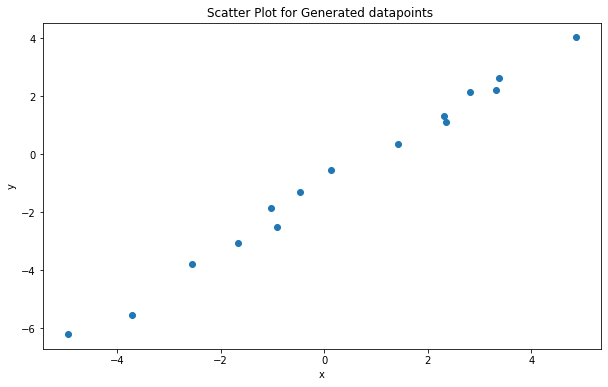

In [ ]:
#ploting a scatter plots
plt.figure(figsize=(10,6))
plt.scatter(x_list, y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot for Generated datapoints ")
plt.show()

In [ ]:
#loss from the prediction value
def loss(w, b, x, y, lossType):
  lossArray = 0
  try:
    assert(lossType == "absolute" or lossType == "square")
    y_pred = x.dot(np.array((w,b))).flatten()
    error = y_pred-y
    #print(w, x, b, y_pred)
    if(lossType == "absolute"):
      lossArray = np.absolute(error)
      return lossArray
    else:
      lossArray = np.power(error,2)
      return lossArray
  except Exception as e:
    print(e)
    return np.zeros(shape = (n))

#average loss of all datapoints
def cost(w, b, x, y, lossType):
  total_loss = 0
  temp_loss = 0
  
  temp_loss = loss(w, b, x, y, lossType)
  total_loss = np.sum(temp_loss)
    

  return (total_loss/(2*n))

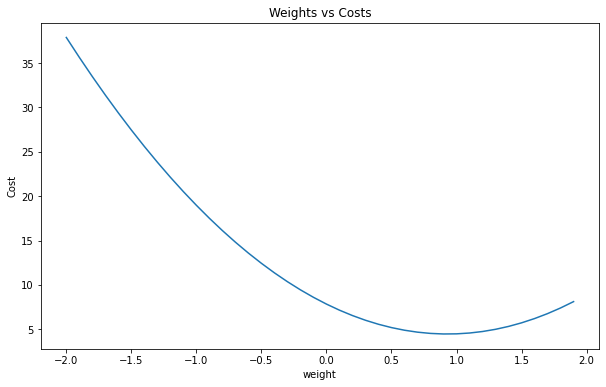

In [ ]:
#weight [-2 to 2 at a interval of 0.1 ] vs cost
w_list = []
cost_list =[]

b = np.random.uniform(-2,2)
for i in range(-20,20,1):
  temp_cost = cost(float(i/10), b, x_data, y_data, "square")
  w_list.append(i/10)
  cost_list.append(temp_cost)

plt.figure(figsize=(10,6))
plt.plot(w_list, cost_list)
plt.xlabel("weight")
plt.ylabel("Cost")
plt.title("Weights vs Costs")
plt.show()

Text(0.5, 0, 'cost')

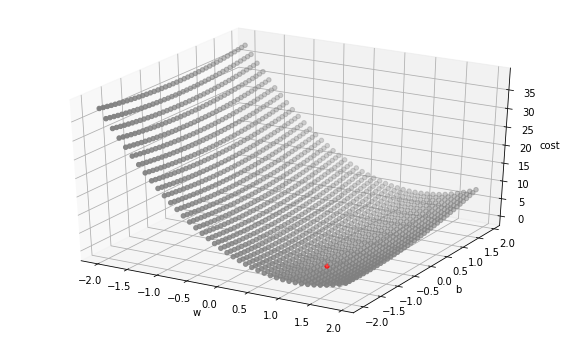

In [ ]:
w_list = []
cost_list =[]
b_list = []

for b in range(-20,20):
  b = float(b/10)
  for i in range(-20,20,1):
    temp_cost = cost(float(i/10), b, x_data, y_data, "square")
    w_list.append(i/10)
    b_list.append(b)
    cost_list.append(temp_cost)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
min_cost = min(cost_list)
mask = np.array(cost_list) == min_cost
color = np.where(mask, "red", "gray")

ax.scatter3D(w_list, b_list, cost_list, color = color)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

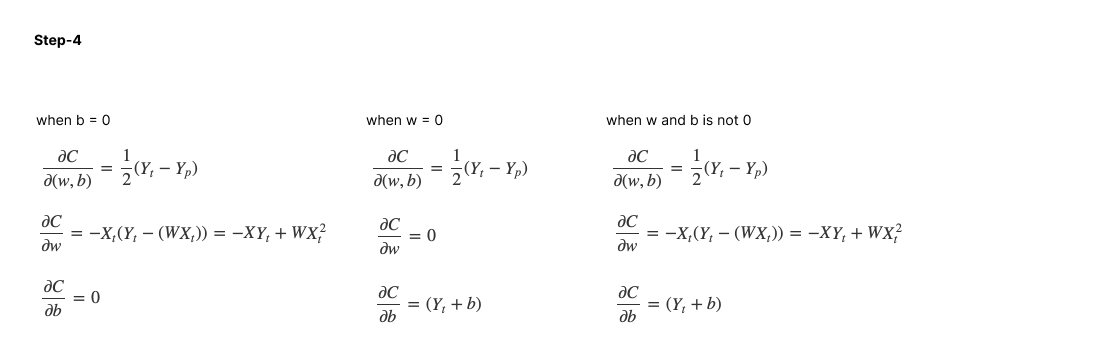

b_optimum: -0.7


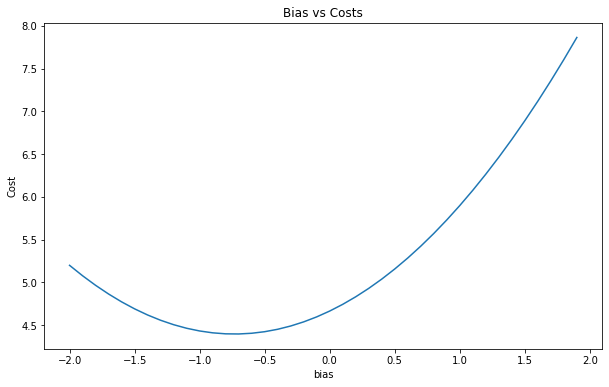

In [ ]:
#when w_true = 0 the y = b_true

b_list = []
cost_list =[]

#b = np.random.uniform(-2,2)
for i in range(-20,20,1):
  temp_cost = cost(0, float(i/10), x_data, y_data, "square")
  b_list.append(i/10)
  cost_list.append(temp_cost)

value, index = min((value, index) for (index, value) in enumerate(cost_list))
print("b_optimum:", b_list[index])

plt.figure(figsize=(10,6))
plt.plot(b_list, cost_list)
plt.xlabel("bias")
plt.ylabel("Cost")
plt.title("Bias vs Costs")
plt.show()

w_optimum: 1.0


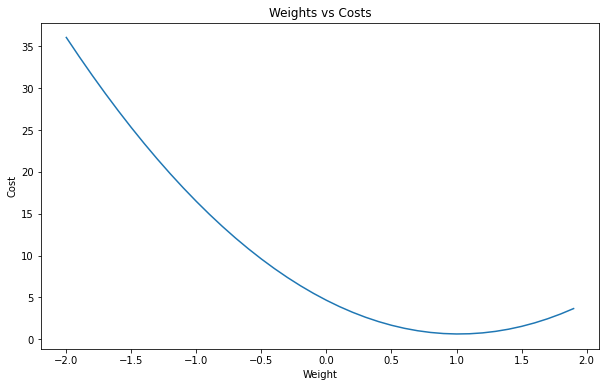

In [ ]:
#when b_true = 0 the y = w_true*x
w_list = []
cost_list =[]


#b = np.random.uniform(-2,2)
for i in range(-20,20,1):
  temp_cost = cost(float(i/10), 0, x_data, y_data, "square")
  w_list.append(i/10)
  cost_list.append(temp_cost)

value, index = min((value, index) for (index, value) in enumerate(cost_list))
print("w_optimum:", w_list[index])

plt.figure(figsize=(10,6))
plt.plot(w_list, cost_list)
plt.xlabel("Weight")
plt.ylabel("Cost")
plt.title("Weights vs Costs")
plt.show()

In [ ]:
#step-5

def computeDeriv_dC_dw(w,b,x,Y):
  total_derivative = 0
  #x = [x1, x2, x3, ...] , theta = [w0, w1, w2, ...] 
  y_pred = x@[w,b]
  total_derivative = np.sum(((y_pred-y_data)*x_data[:,0]))
  return total_derivative/x.shape[0]

def computeDeriv_dC_db(w,b,x,Y):
  total_derivative = 0
  y_pred = x@[w,b]
  total_derivative = np.sum(((y_pred-y_data)))
  return total_derivative/x.shape[0]

In [ ]:
#step-6
def updateParams(w,b,x_data, y_data, alpha, epochs):
  w_gradient_list = []
  b_gradient_list = []
  w_updated_list = []
  b_updated_list = []

  w_updated_list.append(w)
  b_updated_list.append(b)

  for n in range(1,epochs):
    w_gradient = computeDeriv_dC_dw(w, b, x_data, y_data)
    b_gradient = computeDeriv_dC_db(w, b, x_data, y_data)

    w_last = w-(alpha*w_gradient)
    b_last = b-(alpha*b_gradient)

    w_updated_list.append(w_last)
    b_updated_list.append(b_last)

    w_gradient_list.append(w_gradient)
    b_gradient_list.append(b_gradient)

    w = w_last
    b = b_last
    
  w_gradient_list.append(0)
  b_gradient_list.append(0)

  return (w_gradient_list, b_gradient_list)

In [ ]:
w_gradient_list, b_gradient_list = updateParams(w_b[0][0], w_b[0][1], x_data, y_data, 0.001, 50)

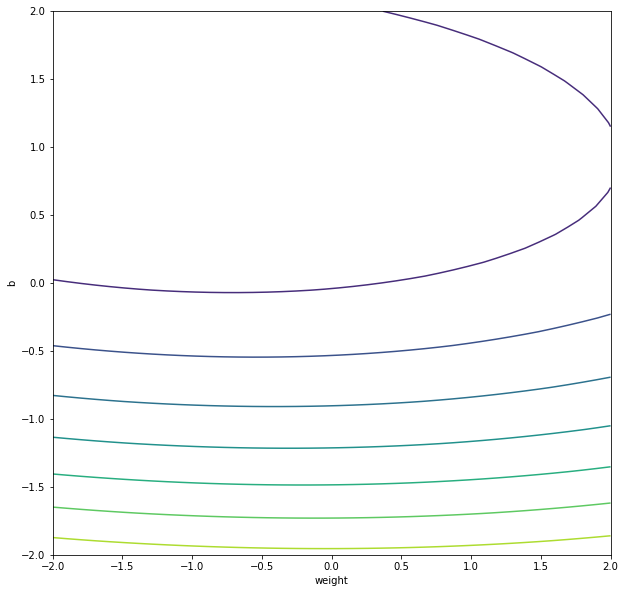

In [ ]:
w_list = np.linspace(-2,2,40)
b_list = np.linspace(-2,2,40)
cost_mesh = np.zeros(shape=(w_list.size, b_list.size))

for i, value1 in enumerate(w_list):
  for j,value2 in enumerate(b_list):
    cost_mesh[i,j] = cost(value1, value2, x_data, y_data, "square")
w_list, b_list = np.meshgrid(w_list, b_list)

fig = plt.figure(figsize=(10,10))
ax = fig.subplots()
ax.contour(w_list, b_list, cost_mesh)

ax.set_xlabel("weight")
ax.set_ylabel("b")
plt.show()

**Step-7**

In [ ]:
#average loss of all datapoints with added regularization 
def cost_r(w, b, x, y, lamda, lossType):
  total_loss = 0
  temp_loss = 0

  temp_loss = loss(w, b, x, y, lossType) 
  total_loss = np.sum(temp_loss)

  return ((total_loss + (lamda)*(pow(w,2)+pow(b,2)))/(2*n))

#partial derivation of regularized cost with respect to w
def compute_reg_deriv_dC_dw(w, b, lamda, x, y):
  total_derivative = 0
  for i in range(len(x)):
    total_derivative = total_derivative + x[i]*((w*x[i]+b)-y[i]) + (lamda*w)
  
  return (total_derivative/n)

##partial derivation of regularized cost with respect to b
def compute_reg_deriv_dC_db(w, b, lamda, x, y):
  total_derivative = 0
  for i in range(len(x)):
    total_derivative = total_derivative + ((w*x[i]+b)-y[i]) + (lamda*b)
  return (total_derivative/n)

**Step-8**

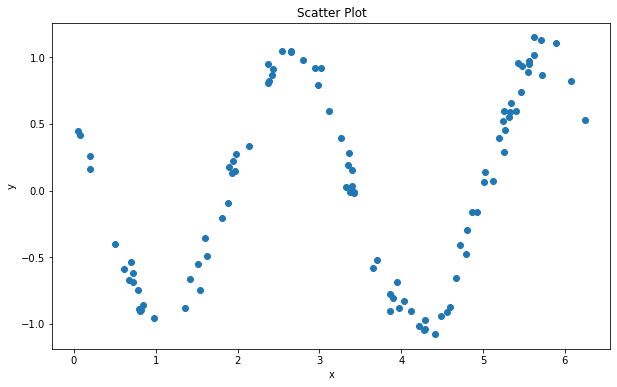

In [ ]:
#a
#for this dataset, our assumption is y = cos(2x+1)+ noise
x_data,y_data = np.load("/content/dataset_cos.npy")
x_data = np.column_stack((x_data, np.ones(x_data.shape[0])))

#ploting a scatter plots
plt.figure(figsize=(10,6))
plt.scatter(x_data[:,0], y_data)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot")
plt.show()

In [ ]:
#b
#do linear regression on the given data
w = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)

cost = (1/2n)(y_pred-y_true)^2
here, y_pred = 0

for x in range of 0 to 2pi

cost = (1/2n)(-cos(wx+b))^2


In [ ]:
w_gradient_list, b_gradient_list = updateParams(w, b, x_data, y_data, 0.05, 1000)

In [ ]:
cost_list = []
for i, (w,b) in enumerate(zip(w_gradient_list, b_gradient_list)):
  cost_list.append(cost(w, b, x_data, y_data, "square"))

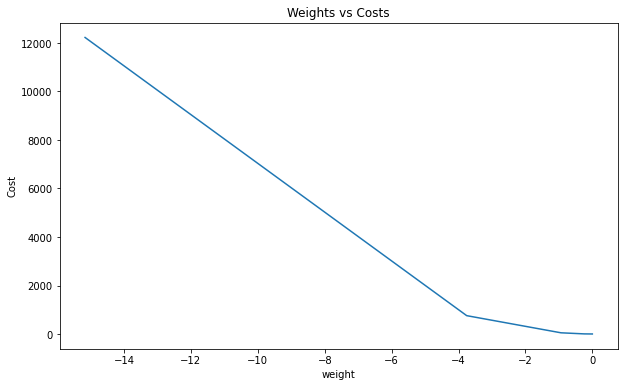

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(w_gradient_list, cost_list)
plt.xlabel("weight")
plt.ylabel("Cost")
plt.title("Weights vs Costs")
plt.show()

In [ ]:
def nonlinear_cost(w, b, x_data, y_data, lossType):
  return np.sum(np.power((np.cos(x_data@[w,b]) - y_data), 2))/x_data.shape[0]

In [ ]:
#c
#do find partial derivation with respect to w and b

def nonlinear_computeDeriv_dC_dw(w,b,x,Y):
  total_derivative = 0
  #x = [[x1,1], [x2,1], [x3,1], ...] , theta = [w0, w1, w2, ...] 
  y_pred = np.cos(x@[w,b])
  total_derivative = (y_pred-Y)@(-np.sin(x@[w,b])*x[:,0])
  return total_derivative/x.shape[0]

def nonlinear_computeDeriv_dC_db(w,b,x,Y):
  total_derivative = 0
  y_pred = np.cos(x@[w,b])
  total_derivative = (y_pred-Y)@(-np.sin(x@[w,b]))
  return total_derivative/x.shape[0]

def nonlinear_updateParams(w,b,x_data, y_data, alpha, epochs):
  w_gradient_list = []
  b_gradient_list = []
  w_updated_list = []
  b_updated_list = []

  w_updated_list.append(w)
  b_updated_list.append(b)

  for n in range(1,epochs):
    w_gradient = nonlinear_computeDeriv_dC_dw(w, b, x_data, y_data)
    b_gradient = nonlinear_computeDeriv_dC_db(w, b, x_data, y_data)

    w_last = w-(alpha*w_gradient)
    b_last = b-(alpha*b_gradient)

    w_updated_list.append(w_last)
    b_updated_list.append(b_last)

    w_gradient_list.append(w_gradient)
    b_gradient_list.append(b_gradient)

    w = w_last
    b = b_last
    
  w_gradient_list.append(0)
  b_gradient_list.append(0)

  return (w_updated_list, b_updated_list)

**Suppose you didn’t know that wtrue=2, based on the dataset provided can you think of a way to estimate wtrue? Describe it clearly.**

As the data is non linear, the simple line function will not be a good fit for such data. As it's given that data is generated using a cos(wx+b) , In order to find w_optimum, I'll initialize parameters randomly and I'll calculate the total cost and then find gradient of that cost function. Gradient will give us the steepest direction and using a learning rate I'll optimize my parameters until the total epochs, that way we will be able to find a optimum value of parameters (w,b). 

Another, quick way could be to plot a cos(wx) line on datapoints and calculate the cost. Now,change value of w manually for some times , we can add "b" as well and check for which parameters the line is fitting closest to the data, that way we can roughly get the idea about in which range the parameters will land in the end.


In [ ]:
#d
#learning rate 0.05
# (winitial=0.1,binitial=0.0)
# (winitial=0.5,binitial=0.0)
# (winitial=1.5,binitial=0.0)
# (winitial=1.9,binitial=0.0)

w_list = [0.1,0.5,1.5,1.9]
b_list = [0.0, 0.0, 0.0, 0.0]
w_gradient_list = []
b_gradient_list = []

for i, (w,b) in enumerate(zip(w_list, b_list)):
    w_gradients, b_gradients = nonlinear_updateParams(w, b, x_data, y_data, 0.05, 1000)
    w_gradient_list.append(w_gradients)
    b_gradient_list.append(b_gradients)


In [ ]:
costs = []
for i, (w_list,b_list) in enumerate(zip(w_gradient_list, b_gradient_list)):
  cost_list = []
  for j, (w, b) in enumerate(zip(w_list, b_list)):
      cost_list.append(nonlinear_cost(w, b, x_data, y_data, "square"))
  costs.append(cost_list)
  

In [ ]:
index = costs[3].index(min(costs[3]))
print("Min Cost", min(costs[3]))
print("w", w_gradient_list[3][index])
print("b", b_gradient_list[3][index])

Min Cost 0.008668332076097155
w 2.009394675513916
b 0.9504581444973765


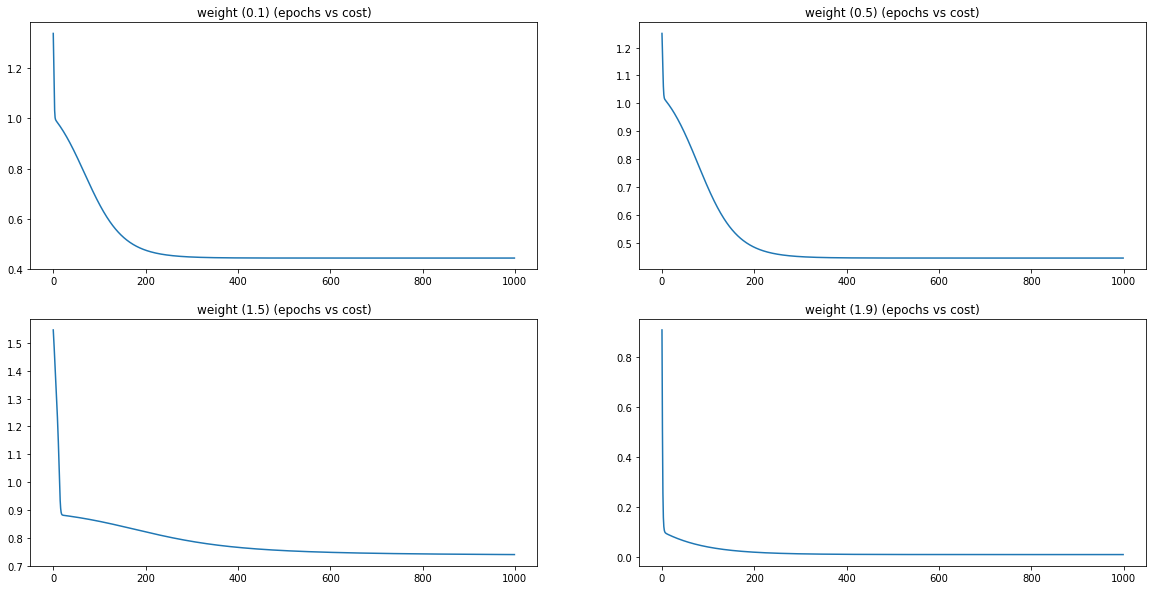

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
axs[0,0].plot(range(1000), costs[0])
axs[0,0].set_title("weight (0.1) (epochs vs cost)")

axs[0,1].plot(range(1000), costs[1])
axs[0,1].set_title("weight (0.5) (epochs vs cost)")

axs[1,0].plot(range(1000), costs[2])
axs[1,0].set_title("weight (1.5) (epochs vs cost)")

axs[1,1].plot(range(1000), costs[3])
axs[1,1].set_title("weight (1.9) (epochs vs cost)")

plt.show()

our cost is getting lower as we shift W toward -2 in a gradient descent process, the lowest cost value I got is 0.008953016384824675 fro w = 1.999442414086057 || b = 0.027988030548188415. The dataset is generated using cos(wx+b) function. So, our w and b should also create a fitting line similar to the cos wave.




In [ ]:
#e
def nonlinear_updateParams_momentum(w,b,x_data, y_data, alpha, epochs, mfactor):
  w_gradient_list = []
  b_gradient_list = []
  w_updated_list = []
  b_updated_list = []
  last_momentum_w = 0
  last_momentum_b = 0

  w_updated_list.append(w)
  b_updated_list.append(b)

  for n in range(1,epochs):
    w_gradient = nonlinear_computeDeriv_dC_dw(w, b, x_data, y_data)
    b_gradient = nonlinear_computeDeriv_dC_db(w, b, x_data, y_data)

    momentum_w = last_momentum_w*mfactor + w_gradient
    momentum_b = last_momentum_b*mfactor + b_gradient

    w_last = w-(alpha*momentum_w)
    b_last = b-(alpha*momentum_b)

    w_updated_list.append(w_last)
    b_updated_list.append(b_last)

    w_gradient_list.append(w_gradient)
    b_gradient_list.append(b_gradient)

    w = w_last
    b = b_last

    last_momentum_w = momentum_w
    last_momentum_b = momentum_b
    
  w_gradient_list.append(0)
  b_gradient_list.append(0)

  return (w_updated_list, b_updated_list)

In [ ]:
#learning rate 0.05 + momentum_factor = 0.9
# (winitial=0.1,binitial=0.0)
# (winitial=0.5,binitial=0.0)
# (winitial=1.5,binitial=0.0)
# (winitial=1.9,binitial=0.0)

w_list = [0.1,0.5,1.5,1.9]
b_list = [0.0, 0.0, 0.0, 0.0]
w_gradient_list = []
b_gradient_list = []

for i, (w,b) in enumerate(zip(w_list, b_list)):
    w_gradients, b_gradients = nonlinear_updateParams_momentum(w, b, x_data, y_data, 0.05, 1000, 0.99)
    w_gradient_list.append(w_gradients)
    b_gradient_list.append(b_gradients)
  

In [ ]:
len(x_data)

100

In [ ]:
costs = []
for i, (w_l,b_l) in enumerate(zip(w_gradient_list, b_gradient_list)):
  cost_list = []
  for j, (w, b) in enumerate(zip(w_l, b_l)):
      cost_list.append(nonlinear_cost(w, b, x_data, y_data, "square"))
  costs.append(cost_list)

In [ ]:
len(costs[0])

1000

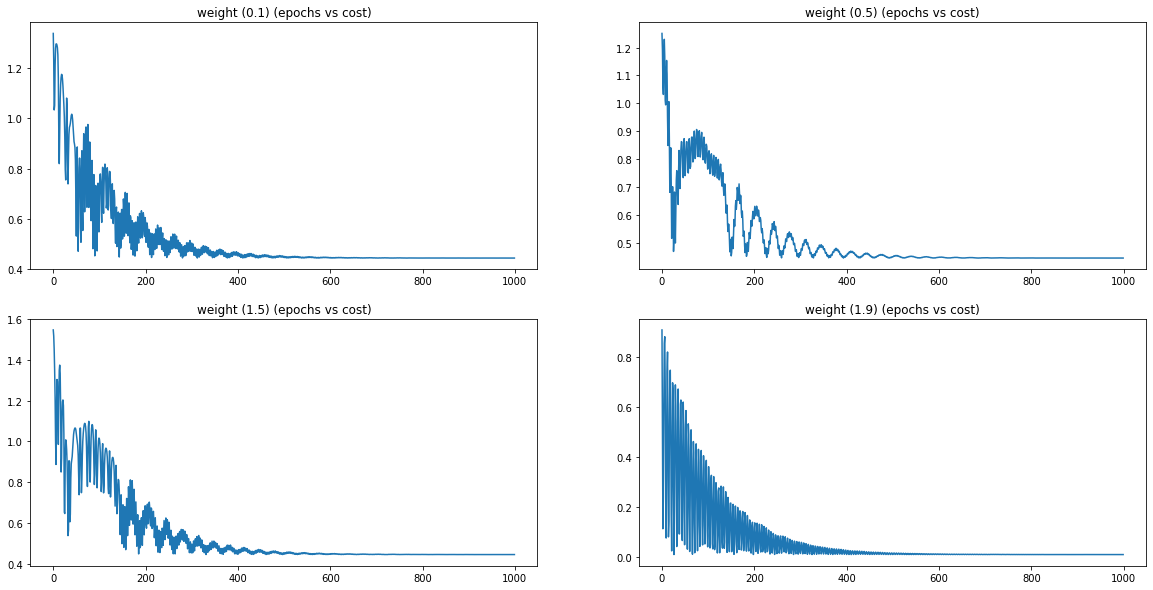

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
axs[0,0].plot(range(1000), costs[0])
axs[0,0].set_title("weight (0.1) (epochs vs cost)")

axs[0,1].plot(range(1000), costs[1])
axs[0,1].set_title("weight (0.5) (epochs vs cost)")

axs[1,0].plot(range(1000), costs[2])
axs[1,0].set_title("weight (1.5) (epochs vs cost)")

axs[1,1].plot(range(1000), costs[3])
axs[1,1].set_title("weight (1.9) (epochs vs cost)")

plt.show()

After using momentum 
1. we can observe earlier cost reduction for almost all the initial values
2. specially, in w = 1.5 we reached a better cost values  

In [ ]:
#f
#stocastic gradient descent


def nonlinear_computeDeriv_dL_dw(w, b, x, y):
  total_derivative = 0
  #x = [[x1,1], [x2,1], [x3,1], ...] , theta = [w0, w1, w2, ...] 
  y_pred = np.cos(w*x+b)
  total_derivative = (y_pred-y)*(-np.sin(w*x+b)*x)
  return total_derivative

def nonlinear_computeDeriv_dL_db(w, b, x, y):
  total_derivative = 0
  y_pred = np.cos(w*x+b)
  total_derivative = (y_pred-y)*(-np.sin(w*x+b))
  return total_derivative


def stochastic_nonlinear_updateParams(w, b, x_data, y_data, alpha, epochs):
  w_gradient_list = []
  b_gradient_list = []
  w_updated_list = []
  b_updated_list = []

  w_updated_list.append(w)
  b_updated_list.append(b)

  for n in range(0,epochs):
    #x_data, y_data = shuffle(x_data, y_data)
    for i, (x,y) in enumerate(zip(x_data, y_data)):
      w_gradient = nonlinear_computeDeriv_dL_dw(w, b, x, y)
      b_gradient = nonlinear_computeDeriv_dL_db(w, b, x, y)

      w_last = w-(alpha*w_gradient)
      b_last = b-(alpha*b_gradient)

      w_updated_list.append(w_last)
      b_updated_list.append(b_last)

      w_gradient_list.append(w_gradient)
      b_gradient_list.append(b_gradient)

      w = w_last
      b = b_last
  

  return (w_gradient_list, b_gradient_list)


In [ ]:
wg_list = []
bg_list = []

for i, (w,b) in enumerate(zip(w_list, b_list)):
    w_gradients, b_gradients = stochastic_nonlinear_updateParams(w, b, x_data[:,0], y_data, 0.05, 1000)
    wg_list.append(w_gradients)
    bg_list.append(b_gradients)

In [ ]:
def nonlinear_cost(w, b, x_data, y_data, lossType):
  return np.sum(np.power((np.cos(x_data@[w,b])-y_data),2)) / x_data.shape[0]

In [ ]:
costs = []
for i, (w_l,b_l) in enumerate(zip(wg_list, bg_list)):
    cost_list = []
    for j, (w,b) in enumerate(zip(w_l, b_l)):
      cost_list.append(nonlinear_cost(w, b, x_data, y_data, "square"))
    costs.append(cost_list)

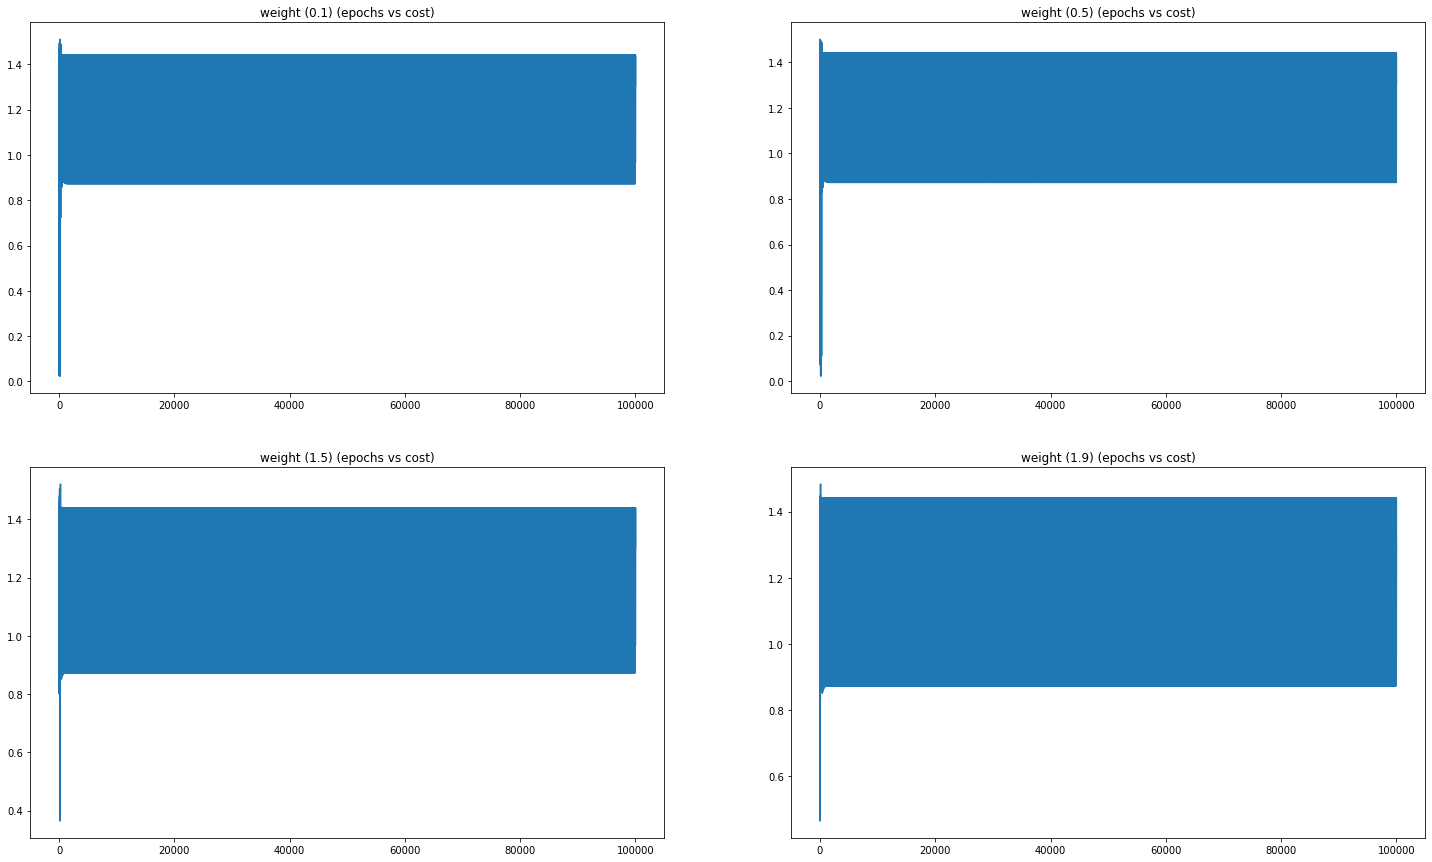

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(25,15))
iteration1 = range(len(costs[0]));
axs[0,0].plot(iteration1, costs[0])
axs[0,0].set_title("weight (0.1) (epochs vs cost)")

iteration2 = range(len(costs[1]));
axs[0,1].plot(iteration2, costs[1])
axs[0,1].set_title("weight (0.5) (epochs vs cost)")

iteration3 = range(len(costs[2]));
axs[1,0].plot(iteration3, costs[2])
axs[1,0].set_title("weight (1.5) (epochs vs cost)")

iteration4 = range(len(costs[3]));
axs[1,1].plot(iteration4, costs[3])
axs[1,1].set_title("weight (1.9) (epochs vs cost)")

plt.show()

Stochastic gradient descent has more fluctuation compared to the normal one. But, I feel there is some issue with my implementation as after 1000

In [ ]:
#g

def stochastic_nonlinear_updateParams_momentum(w, b, x_data, y_data, alpha, momentumFactor, epochs):
  w_gradient_list = []
  b_gradient_list = []
  w_updated_list = []
  b_updated_list = []

  w_updated_list.append(w)
  b_updated_list.append(b)

  last_momentum_w = 0
  last_momentum_b = 0

  for n in range(0,epochs):
    #x_data, y_data = shuffle(x_data, y_data)
    for i, (x,y) in enumerate(zip(x_data, y_data)):
      w_gradient = nonlinear_computeDeriv_dL_dw(w, b, x, y)
      b_gradient = nonlinear_computeDeriv_dL_db(w, b, x, y)

      momentum_w = last_momentum_w*momentumFactor + w_gradient
      momentum_b = last_momentum_b*momentumFactor + b_gradient

      w_last = w-(alpha*w_gradient)
      b_last = b-(alpha*b_gradient)

      w_updated_list.append(w_last)
      b_updated_list.append(b_last)

      w_gradient_list.append(w_gradient)
      b_gradient_list.append(b_gradient)

      w = w_last
      b = b_last

      last_momentum_w = momentum_w
      last_momentum_b = momentum_b

  return (w_gradient_list, b_gradient_list)

In [ ]:
wg_list = []
bg_list = []

for i, (w,b) in enumerate(zip(w_list, b_list)):
    w_gradients, b_gradients = stochastic_nonlinear_updateParams_momentum(w, b, x_data[:,0], y_data, 0.0005, 0.99,1000)
    wg_list.append(w_gradients)
    bg_list.append(b_gradients)

In [ ]:
costs = []
for i, (w_l,b_l) in enumerate(zip(wg_list, bg_list)):
    cost_list = []
    for j, (w,b) in enumerate(zip(w_l, b_l)):
      cost_list.append(nonlinear_cost(w, b, x_data, y_data, "square"))
    costs.append(cost_list)

Text(0.5, 1.0, 'weight (1.9) (epochs vs cost)')

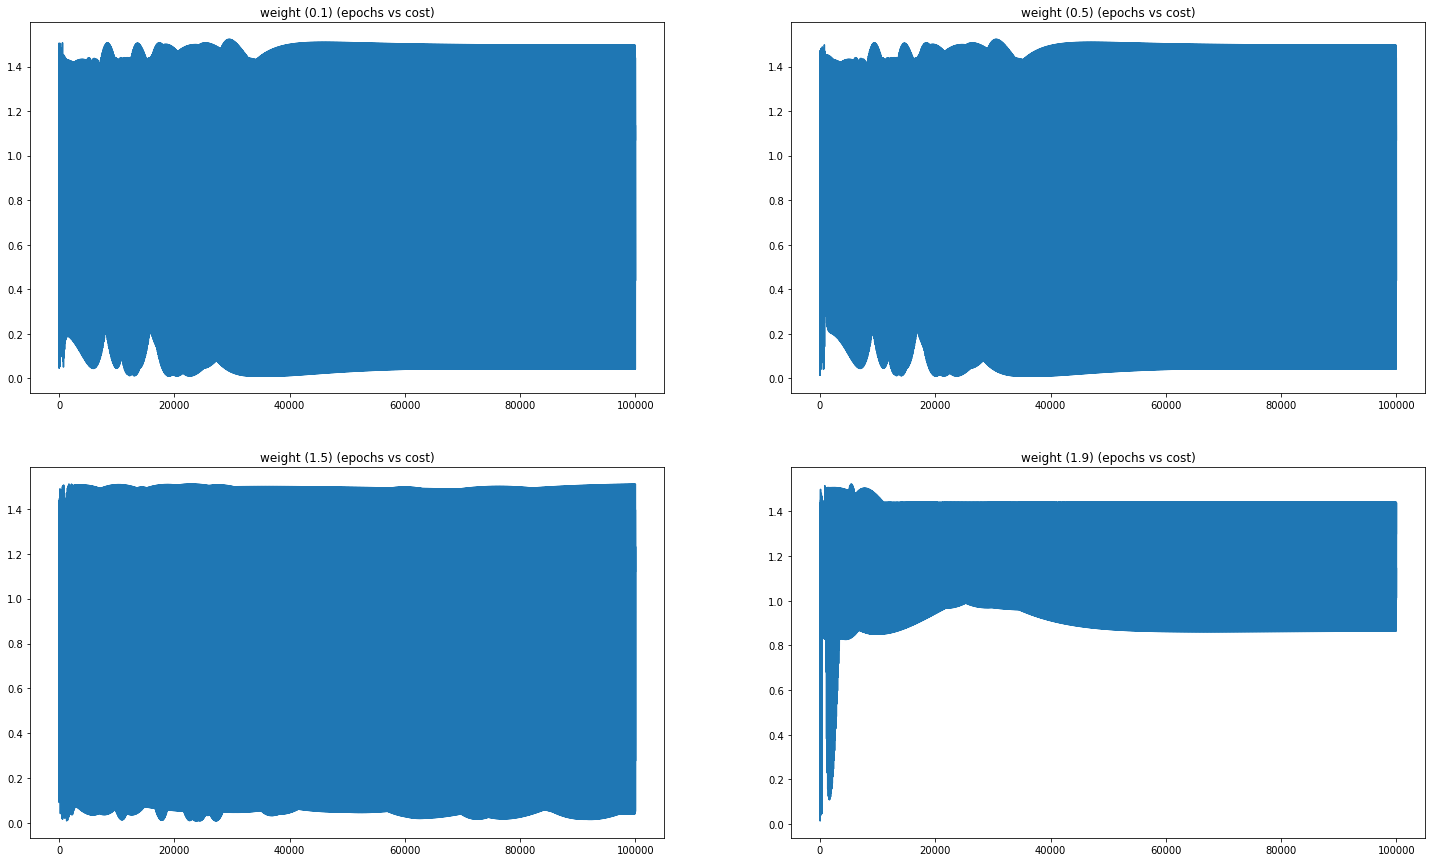

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(25,15))
iteration1 = range(len(costs[0]));
axs[0,0].plot(iteration1, costs[0])
axs[0,0].set_title("weight (0.1) (epochs vs cost)")

iteration2 = range(len(costs[1]));
axs[0,1].plot(iteration2, costs[1])
axs[0,1].set_title("weight (0.5) (epochs vs cost)")

iteration3 = range(len(costs[2]));
axs[1,0].plot(iteration3, costs[2])
axs[1,0].set_title("weight (1.5) (epochs vs cost)")

iteration4 = range(len(costs[3]));
axs[1,1].plot(iteration4, costs[3])
axs[1,1].set_title("weight (1.9) (epochs vs cost)")

here, the gradients are very fluctuating but also the costs got down a bit.